In [86]:
!pip install pyyaml==5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [87]:
!pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [88]:
import torch
print (torch.__version__)
print (torch.cuda.is_available())

1.7.1+cu101
True


In [89]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html


In [90]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

import cv2
from google.colab.patches import cv2_imshow

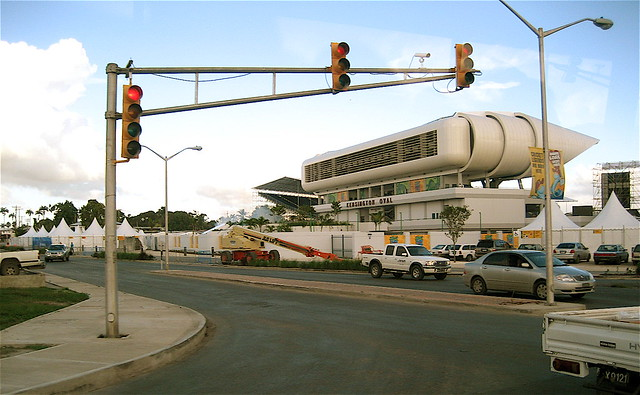

In [107]:
image = cv2.imread("./39.jpg")
cv2_imshow(image)

In [108]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")

cfg.MODEL.ROI_HEADS.SOCRE_TRESEH_TEST = 0.6

In [109]:
predictor = DefaultPredictor(cfg)
outputs = predictor(image)


  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


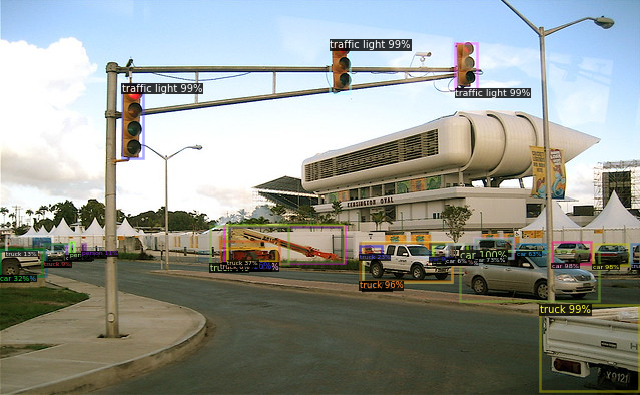

In [110]:
viz = Visualizer(image[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]))
output = viz.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(output.get_image()[:,:,::-1])